# 東京大学　データマイニング入門

## 課題3 データの前処理と可視化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q1,欠損値の処理
pandasのシリーズやデータフレームではデータに欠損値（例えば数値データ内の空値）が含
まれる場合、欠損値が NaN となります。以下では欠損値（空値）を含む得点データのcsvフ
ァイル, 'score_missing.csv', を読み込み、データフレーム score を作成

In [3]:
score = pd.read_csv("missing_score.csv")
score

,kokugo,shakai,sugaku,raka
0,30.0,43.0,51,NaN
1,39.0,21.0,50,56.0
2,NaN,NaN,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,NaN,53,NaN
6,29.0,26.0,44,52.0
7,NaN,54.0,37,59.0
8,45.0,NaN,7,44.0
9,68.0,41.0,29,81.0


欠損値を抽出する

In [6]:
# データフレームから欠損地を含む行を抽出
score[score.isnull().any(axis=1)]

,kokugo,shakai,sugaku,raka
0,30.0,43.0,51,NaN
2,NaN,NaN,23,57.0
5,66.0,NaN,53,NaN
7,NaN,54.0,37,59.0
8,45.0,NaN,7,44.0


In [7]:
# データフレームから欠損地を含む列を抽出
score.loc[:,score.isnull().any()]

,kokugo,shakai,raka
0,30.0,43.0,NaN
1,39.0,21.0,56.0
2,NaN,NaN,57.0
3,29.0,87.0,100.0
4,70.0,71.0,67.0
5,66.0,NaN,NaN
6,29.0,26.0,52.0
7,NaN,54.0,59.0
8,45.0,NaN,44.0
9,68.0,41.0,81.0


欠損値の補完

pandasの fillna() メソッドを使うと欠損値を補完することができます。以下では、欠損値
が含まれる列の欠損がない要素の値の平均値でその列にある欠損値を補完していま
す。

In [8]:
score = pd.read_csv("missing_score.csv")
score.fillna(score.mean())

,kokugo,shakai,sugaku,raka
0,30.0,43.0,51,64.5
1,39.0,21.0,50,56.0
2,47.0,49.0,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,49.0,53,64.5
6,29.0,26.0,44,52.0
7,47.0,54.0,37,59.0
8,45.0,49.0,7,44.0
9,68.0,41.0,29,81.0


Q1.1


欠損値（空値）を含む得点データのcsvファイル, 'score_missing.csv', を読み込み作成したデ
ータフレームを受け取り、各列の欠損値をその列の欠損がない要素の値の中央値で補完した
データフレームを返す fill_median() 関数を完成させてください。

In [12]:
score = pd.read_csv("missing_score.csv")
def fill_median(df):
  return df.fillna(score.median())

In [13]:
fill_median(score).sum().sum()

2013.0

### Q2 外れ値の処理
NumPyでの記述統計


以下では、次のような形式の"exam_score.csv"ファイルを読み込み、NumPyの配列を作成
し、NumPyの関数または ndarray オブジェクトのメソッドを用いて、配列の記述統計を求
めています。

In [19]:
#pdfからcsvにしたのでコンマ区切りに変換
import re
 
with open('exam_score.csv', 'r', newline='') as file,open('exam_score_out.csv', 'w', newline='') as fileout:
        text = re.sub(r's* ', ',', file.read())
        print(text, file = fileout)
        print('置換完了')

置換完了


In [20]:
# csvファイルからnumPy配列の作成
score = np.loadtxt('exam_score_out.csv',delimiter=",",skiprows=1)

In [21]:
# NumPyの関数で配列の各列の平均、分散、中央値、最大、最小を求める
print(np.mean(score, axis=0)) # 平均
print(np.var(score, axis=0)) # 分散
print(np.median(score, axis=0)) # 中央値
print(np.amax(score, axis=0)) # 最大値
print(np.amin(score, axis=0)) # 最小値

[52.3313253  39.60240964 45.61445783 49.88554217]
[473.93239222 457.60095805 583.85135724 455.54714037]
[53. 35. 43. 49.]
[ 96.  90. 100. 100.]
[0. 4. 0. 9.]


In [22]:
# ndarrayのメソッドで配列の各列の平均、分散、最大、最小を求める
print(score.mean(0)) # 平均
print(score.var(0)) # 分散
print(score.max(0)) # 最大値
print(score.min(0)) # 最小値

[52.3313253  39.60240964 45.61445783 49.88554217]
[473.93239222 457.60095805 583.85135724 455.54714037]
[ 96.  90. 100. 100.]
[0. 4. 0. 9.]


Q2.1

整数を要素とする任意の長さの1次元配列を入力として受け取り、配列の要素の値の中で、以
下の外れ値の基準にあてはまる要素からなる1次元配列を返す find_outliers() 関数を完
成させてください。なお、IQRは四分位範囲であり、第3四分位から第1四分位を引いた値で
す。

（第1四分位-1.5IQR）を値の下限としてそれより小さい値は外れ値とする


（第3四分位+1.5IQR）を値の上限としてそれより大きい値は外れ値とする


配列の第1四分位と第3四分位は、NumPyの percentile() 関数を用いて以下のように求め
られる。


第1四分位, 第3四分位=np.percentile(配列, [25, 75])

In [31]:
def find_outliers(input_array):
  first_range ,third_range = np.percentile(input_array,[25,75])
  IQR = 1.5 * (third_range - first_range)
  min_score = first_range - IQR  #下限外れ値
  max_score = third_range + IQR  #上限外れ値
  output =[]
  for w in input_array :
    if w < min_score or w > max_score :
      output.append(w)
  print(output)
  
find_outliers(np.array([30,39,-100,29,95,70,67,200,29,1000,56,45,68]))

[-100, 200, 1000]


Q2.2

score を受け取り、各列ごとに、Q2.1と同様に四分位範囲, 第3四分位, 第1四分位を用いて
外れ値を検出し、外れ値を含む行を除いたデータフレームを返す関数 drop_outliers() を
完成させてください。

In [32]:
#pdfからcsvにしたのでコンマ区切りに変換
import re
 
with open('score_outlier.csv', 'r', newline='') as file,open('score_outlier_out.csv', 'w', newline='') as fileout:
        text = re.sub(r's* ', ',', file.read())
        print(text, file = fileout)
        print('置換完了')

置換完了


悩むポイント

各行ごとに処理を行う必要、
外れ値を含む行を除くコードの記述

In [74]:
score = pd.read_csv('score_outlier_out.csv')

def drop_outlier(df):
  for i in range(len(df.columns)):
    col = df.iloc[:,i]
    q1 = col.describe()['25%']
    q3 = col.describe()['75%']
    iqr = q3 - q1 #四分位範囲
    min_score = q1 - (iqr) * 1.5   #下限外れ値
    max_score = q3 + (iqr) * 1.5  #上限外れ値
    # 範囲から外れている値を除く
    col[col < min_score] = None
    col[col > max_score] = None
  df = df.dropna(how='any', axis=0)
  return df

In [75]:
len(drop_outlier(score).index)

C:\Users\user\AppData\Local\Temp\ipykernel_8568\323991060.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col < min_score] = None
C:\Users\user\AppData\Local\Temp\ipykernel_8568\323991060.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col > max_score] = None
C:\Users\user\AppData\Local\Temp\ipykernel_8568\323991060.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col < min_score] = None
C:\Users\user\AppData\

155

Q2.3

"score_outlier.csv"ファイルを読み込み、NumPyの配列を作成し、各教科の点数の箱ひげ図を
可視化してください

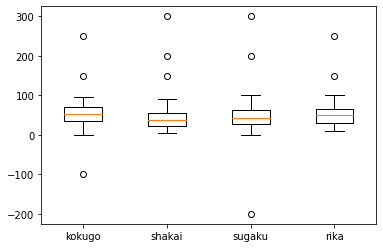

In [81]:
score = np.loadtxt("score_outlier_out.csv", delimiter=",", skiprows=1)

fig = plt.figure()
ax2 = fig.add_subplot() 

ax2.boxplot(score)
ax2.set_xticklabels(['kokugo','shakai','sugaku','rika'])
plt.show()

### Q3 標準化

以下のような形式の"exam_score.csv"ファイルを読み込み、作成したNumPyの配列を受け取
り、各教科の点数をその教科の平均値と分散を用いて標準化した配列を返
す normalize_score() 関数を完成させてください。平均値と分散の計算には、NumPyの
関数またはndarrayオブジェクトのメソッド、どちらを使ってもよいです。また、分散は標本
分散としてください

In [91]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("exam_score_out.csv", delimiter=",", skiprows=1)

def normalize_score(a):
  for i in a:
    amean = np.mean( i , axis = None,keepdims=True) # 平均
    astd = np.std(i,axis=None, keepdims=True)  # 標準偏差
    ascore = (i-amean)/astd  # 標準化
  return ascore

print(normalize_score(score))

[-1.65967682  0.5831297   0.94197874  0.13456839]


pandasでは以下のように簡単に実装できる

In [88]:
score_df = pd.read_csv('exam_score_out.csv')
((score_df - score_df.mean()) / score_df.std(ddof=0)).head(5)

,kokugo,shakai,sugaku,rika
0,-1.025785,0.158828,0.222884,0.614446
1,-0.612372,-0.869612,0.140113,0.286478
2,-1.071720,-0.448887,-0.935912,0.333331
3,1.959977,2.215709,1.298908,2.347991
4,0.811607,1.467753,1.340294,0.801856
